In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
##Road
roadDF = pd.read_csv(r'C:\Users\shaje\OneDrive\Dokumente\Study\3.Quarter\Advanced_Discrete_Simulation\Assignment3\WBSIM_Lab2\infrastructure\_roads3.csv')
roadnames = roadDF.road.unique()
#roadDF = roadDF[roadDF.road == "N1"]
path = 'C:/Users/shaje/OneDrive/Dokumente/Study/3.Quarter/Advanced_Discrete_Simulation/Assignment1/Files/RMMS/RMMS'


##WidthDF
widthDF = pd.DataFrame()
for i in range(len(roadnames)):
    rname = roadnames[i]
    txtPath = path + '/' + rname + ".widths.processed.txt"
    width = pd.read_csv(txtPath, sep = "\t")
    if i == 0:
        widthDF = widthDF.append(width)
    else:
        widthDF = pd.concat([widthDF,width])
widthDF = widthDF.reset_index(drop=True)

widnametraf = ("road", "roadId", "chainage", "chainage end")
for i in range(len(widnametraf)):
    widthDF.columns.values[i] = widnametraf[i]

##TrafficDF
trafficDF = pd.DataFrame()
for i in range(len(roadnames)):
    rname = roadnames[i]
    htmlPath = path + '/' + rname + ".traffic.htm"
    traffic = pd.read_html(htmlPath)[4]
    traffic = traffic.iloc[2:]
    traffic = traffic.reset_index(drop=True)
    header = traffic.iloc[0]
    traffic = traffic[1:]
    traffic.columns = header
    if i == 0:
        trafficDF = trafficDF.append(traffic)
    else:
        trafficDF = pd.concat([trafficDF,traffic])

colnametraf = ("road", "name", "lrp start", "offset start", "chainage", "lrp end", "offset end", "chainage end", "distance")
for i in range(len(colnametraf)):
    trafficDF.columns.values[i] = colnametraf[i]
trafficDF['road'] = trafficDF['road'].map(lambda x: x[:x.rfind("-")])
trafficDF = trafficDF.reset_index(drop=True)

In [41]:
x = trafficDF[trafficDF.road == 'N105'] 

In [42]:
x

,road,name,lrp start,offset start,chainage,lrp end,offset end,chainage end,distance,Heavy Truck,...,Car,Auto Rickshaw,Motor Cycle,Bi-Cycle,Cycle Rickshaw,Cart,Motorized,Non Motorized,Total AADT,(AADT)
128,N105,"Madanpur (13th km of N1)-Nayapur, Bostail (Int...",LRPS,0,0,LRP006,181,6.309,6.309,338.0,...,619.0,5625.0,552.0,145.0,1648.0,0.0,13111.0,1793.0,14904.0,14904.0
129,N105,"Nayapur, Bostail(Int.with R114)-Bhulta (Int.wi...",LRP006,181,6.309,LRP012,546,12.803,6.494,245.0,...,954.0,2332.0,659.0,180.0,1011.0,0.0,10396.0,1191.0,11587.0,11587.0
130,N105,Bhulta (Int.with N2)-Purbachal Road,LRP012,546,12.803,LRP020d,0,21.221,8.418,223.0,...,1275.0,2563.0,484.0,64.0,249.0,0.0,11521.0,313.0,11834.0,11834.0
131,N105,Purbachal Road- Ulukhola (Int.with Z3010),LRP020d,0,21.221,LRP028,895,28.61,7.389,320.0,...,804.0,1144.0,622.0,102.0,363.0,0.0,8791.0,465.0,9256.0,9256.0
132,N105,Ulukhola (Int.with Z3010)-Mirer Bazar (Int.wit...,LRP028,895,28.61,LRP035,1289,36.158,7.548,320.0,...,804.0,1144.0,622.0,102.0,363.0,0.0,8791.0,465.0,9256.0,9256.0
133,N105,Mirer Bazar (Int.with R301)-Vogra Bypass(Int.w...,LRP035,1289,36.158,LRP045,1118,45.998,9.840,320.0,...,804.0,1144.0,622.0,102.0,363.0,0.0,8791.0,465.0,9256.0,9256.0
134,N105,Vogra Bypass(Int.with N3)-End of Road (Int.wit...,LRP045,1118,45.998,LRPE,0,48.881,2.883,328.0,...,1240.0,1243.0,452.0,149.0,1353.0,0.0,10373.0,1502.0,11875.0,11875.0


In [38]:
roadDF

,road,chainage,lrp,lat,lon,gap,type,name
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Others,Start of Road after Jatrabari Flyover infront...
1,N1,0.814,LRPSa,23.702917,90.450417,NaN,Culvert,Box Culvert
2,N1,0.822,LRPSb,23.702778,90.450472,NaN,CrossRoad,Intersection with Z1101
3,N1,1.000,LRP001,23.702139,90.451972,NaN,KmPost,Km post missing
4,N1,2.000,LRP002,23.697889,90.460583,NaN,KmPost,Km post missing
5,N1,2.130,LRP002a,23.697361,90.461667,NaN,Culvert,Box culvert
6,N1,3.000,LRP003,23.693833,90.469138,NaN,KmPost,Km post missing
7,N1,4.000,LRP004,23.693611,90.478777,NaN,KmPost,Km post missing
8,N1,4.175,LRP004a,23.693805,90.480527,NaN,"SideRoad,Right",Road to Narayanganj(R111)
9,N1,5.000,LRP005,23.694750,90.488500,NaN,KmPost,Km post missing


In [39]:
widthDF

,road,roadId,chainage,chainage end,width,nrLanes
0,N1,1585,0.000,0.130,29.7,8.0
1,N1,1585,0.130,0.400,14.0,4.0
2,N1,1585,0.400,1.050,28.3,8.0
3,N1,1585,1.050,5.100,16.5,5.0
4,N1,1585,5.100,6.200,16.2,5.0
5,N1,1585,6.200,6.890,16.0,5.0
6,N1,1585,6.890,7.330,26.0,8.0
7,N1,1585,7.330,7.900,28.0,8.0
8,N1,1585,7.900,8.900,14.9,4.0
9,N1,1585,8.900,9.800,15.0,4.0


In [40]:
def fusion(path, rname, roadDF, trafficDF, widthDF):
    
    ##Assumption: Left and right roads merged into one road
    for i in range(0,len(trafficDF)-1):
        if trafficDF.iloc[i,4]  == trafficDF.iloc[i+1,4]:
            for j in range(9,len(trafficDF.columns)):
                trafficDF.iloc[i+1,j] = float(trafficDF.iloc[i,j]) + float(trafficDF.iloc[i+1,j])
                trafficDF.iloc[i+1,j] = str(trafficDF.iloc[i+1,j])
    trafficDF = trafficDF.drop_duplicates(subset='chainage',keep='last')
    trafficDF = trafficDF.reset_index(drop=True)
    
    ##Unification of the roads and names
    trafficDF['road'] = trafficDF['road'].map(lambda x: x[:x.rfind("-")])

    ##Concate and Convert number from strings to numeric
    halfDF = pd.concat([trafficDF,roadDF,widthDF], keys='chainage', ignore_index=True)
    halfDF = halfDF.convert_objects(convert_numeric=True).sort_values(by='chainage').reset_index()
    halfDF = halfDF.sort_values(by='chainage').reset_index()
    ##Dropping of not needed columns
    finalDF = halfDF.drop(['offset end', 'offset start', 'name', 'roadId', 'index', 'lrp end', 'chainage end', 'distance'], axis=1)
    
    ##Backward and forward filling of the data 
    finalDF[["width","nrLanes"]] = finalDF[["width","nrLanes"]].bfill()
    finalDF2 = finalDF
    finalDF.iloc[:,0:16] = finalDF.iloc[:,0:16].ffill()
    finalDF[["nrLanes","Utility","width"]] = finalDF[["nrLanes","Utility","width"]].ffill()
    ##Dropping last duplicates
    finalDF = finalDF.drop_duplicates(subset=['chainage','lat'],keep='last')
    finalDF = finalDF.sort_values(['chainage', 'lat', 'lon']).drop_duplicates(subset=['chainage'],keep='first')
    
    ##Interpolation of missing coordinates due to concating of three dataframes 
    finalDF.lat = finalDF.lat.interpolate(method = 'linear') 
    finalDF.lon = finalDF.lon.interpolate(method = 'linear')
    
    return finalDF

In [43]:
# roadnames = roadnames[1]
# roadDF = roadDF[roadDF.road == roadnames]
# fusion(path,roadnames,roadDF)

In [49]:
##Appending over all roads
roadnames = roadDF.road.unique()
print(roadnames)
FinalDF = pd.DataFrame()
for i in range(0,len(roadnames)):
    roadn = roadnames[i]
    road = roadDF[roadDF.road == roadn]
    traffic = trafficDF[trafficDF.road == roadn]
    width = widthDF[widthDF.road == roadn]
    finalDF = fusion(path,roadnames,road, traffic, width)
    FinalDF = FinalDF.append(finalDF)
    print(roadn)
FinalDF = FinalDF.reset_index(drop=True)   

['N1' 'N101' 'N102' 'N103' 'N104' 'N105' 'N106' 'N107' 'N108' 'N109'
 'N110' 'N111' 'N112' 'N119' 'N120' 'N123' 'N128' 'N129' 'N2' 'N203'
 'N204' 'N205' 'N206' 'N207' 'N208' 'N209' 'N210' 'N3' 'N302' 'N303'
 'N309' 'N4' 'N401' 'N402' 'N403' 'N404' 'N405' 'N406' 'N407' 'N408' 'N5'
 'N501' 'N502' 'N503' 'N504' 'N505' 'N506' 'N507' 'N508' 'N509' 'N510'
 'N511' 'N513' 'N514' 'N515' 'N516' 'N517' 'N518' 'N520' 'N540' 'N6'
 'N602' 'N603' 'N604' 'N605' 'N7' 'N701' 'N702' 'N703' 'N704' 'N705'
 'N706' 'N707' 'N708' 'N709' 'N710' 'N711' 'N712' 'N715' 'N8' 'N801'
 'N802' 'N803' 'N804' 'N805' 'N806' 'N808' 'N809' 'R110' 'R111' 'R112'
 'R113' 'R114' 'R120' 'R140' 'R141' 'R142' 'R143' 'R144' 'R145' 'R147'
 'R151' 'R152' 'R160' 'R161' 'R162' 'R163' 'R164' 'R170' 'R171' 'R172'
 'R180' 'R201' 'R202' 'R203' 'R210' 'R211' 'R212' 'R220' 'R221' 'R222'
 'R240' 'R241' 'R247' 'R248' 'R249' 'R250' 'R251' 'R280' 'R281' 'R282'
 'R283' 'R301' 'R302' 'R303' 'R310' 'R311' 'R312' 'R313' 'R314' 'R315'
 'R360' 'R364' 

C:\Users\shaje\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\shaje\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shaje\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shaje\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: convert_objects is 

N1
N101
N102
N103
N104
N105
N106
N107
N108
N109
N110
N111
N112
N119
N120
N123
N128
N129
N2
N203
N204
N205
N206
N207
N208
N209
N210
N3
N302
N303
N309
N4
N401
N402
N403
N404
N405
N406
N407
N408
N5
N501
N502
N503
N504
N505
N506
N507
N508
N509
N510
N511
N513
N514
N515
N516
N517
N518
N520
N540
N6
N602
N603
N604
N605
N7
N701
N702
N703
N704
N705
N706
N707
N708
N709
N710
N711
N712
N715
N8
N801
N802
N803
N804
N805
N806
N808
N809
R110
R111
R112
R113
R114
R120
R140
R141
R142
R143
R144
R145
R147
R151
R152
R160
R161
R162
R163
R164
R170
R171
R172
R180
R201
R202
R203
R210
R211
R212
R220
R221
R222
R240
R241
R247
R248
R249
R250
R251
R280
R281
R282
R283
R301
R302
R303
R310
R311
R312
R313
R314
R315
R360
R364
R370
R371
R450
R451
R460
R480
R504
R506
R543
R544
R545
R546
R547
R548
R549
R550
R555
R556
R557
R558
R560
R570
R585
R586
R587
R601
R602
R603
R604
R605
R681
R682
R685
R710
R711
R712
R713
R720
R743
R745
R746
R747
R748
R749
R755
R760
R765
R770
R771
R802
R810
R812
R813
R814
R820
R850
R851
R860
R861
R870
R

In [50]:
FinalDF

,level_0,(AADT),Auto Rickshaw,Bi-Cycle,Car,Cart,Cycle Rickshaw,Heavy Truck,Large Bus,Medium Bus,...,chainage,gap,lat,lon,lrp,lrp start,nrLanes,road,type,width
0,1,40894,5488,445,4459,0,1977,1062,5586,1497,...,0.000,NaN,23.706028,90.443333,LRPS,NaN,8.0,N1,Others,29.7
1,3,40894,5488,445,4459,0,1977,1062,5586,1497,...,0.130,NaN,23.704991,90.445694,NaN,NaN,4.0,N1,NaN,14.0
2,4,40894,5488,445,4459,0,1977,1062,5586,1497,...,0.400,NaN,23.703954,90.448055,NaN,NaN,8.0,N1,NaN,28.3
3,5,40894,5488,445,4459,0,1977,1062,5586,1497,...,0.814,NaN,23.702917,90.450417,LRPSa,NaN,5.0,N1,Culvert,16.5
4,7,40894,5488,445,4459,0,1977,1062,5586,1497,...,0.822,NaN,23.702778,90.450472,LRPSb,NaN,5.0,N1,CrossRoad,16.5
5,8,40894,5488,445,4459,0,1977,1062,5586,1497,...,1.000,NaN,23.702139,90.451972,LRP001,NaN,5.0,N1,KmPost,16.5
6,9,40894,5488,445,4459,0,1977,1062,5586,1497,...,1.050,NaN,23.700014,90.456278,NaN,NaN,5.0,N1,NaN,16.5
7,10,40894,5488,445,4459,0,1977,1062,5586,1497,...,2.000,NaN,23.697889,90.460583,LRP002,NaN,5.0,N1,KmPost,16.2
8,11,40894,5488,445,4459,0,1977,1062,5586,1497,...,2.130,NaN,23.697361,90.461667,LRP002a,NaN,5.0,N1,Culvert,16.2
9,12,40894,5488,445,4459,0,1977,1062,5586,1497,...,3.000,NaN,23.693833,90.469138,LRP003,NaN,5.0,N1,KmPost,16.2


No handles with labels found to put in legend.


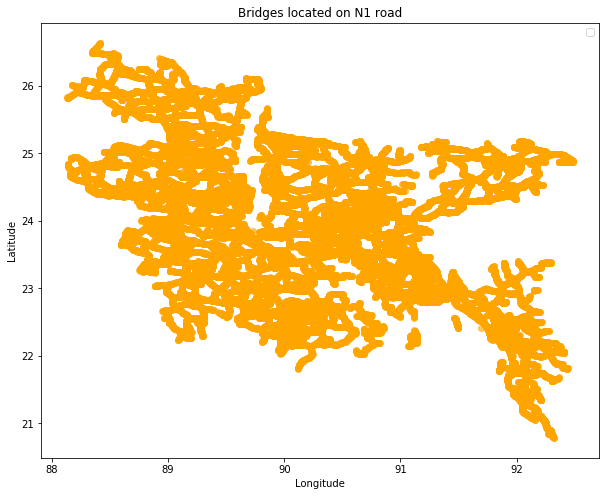

In [54]:
def plot_it(df, graph_name) :
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111)
    ax.scatter(list(FinalDF.lon), list(FinalDF.lat), c = 'orange', alpha = 0.6)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(graph_name)
    plt.legend()
    plt.show()

# Bridges plotting
graph_name = 'Bridges located on N1 road'
plot_it(finalDF, graph_name)

In [55]:
FinalDF.to_csv('final.csv', sep='\t')